# Surrogate for Bessel functions

In [11]:
import arby

In [12]:
import numpy as np

In [13]:
import matplotlib.pyplot as plt

In [14]:
nu = np.linspace(1, 5, num=101)

In [15]:
nu

array([1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28, 1.32, 1.36, 1.4 ,
       1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72, 1.76, 1.8 , 1.84,
       1.88, 1.92, 1.96, 2.  , 2.04, 2.08, 2.12, 2.16, 2.2 , 2.24, 2.28,
       2.32, 2.36, 2.4 , 2.44, 2.48, 2.52, 2.56, 2.6 , 2.64, 2.68, 2.72,
       2.76, 2.8 , 2.84, 2.88, 2.92, 2.96, 3.  , 3.04, 3.08, 3.12, 3.16,
       3.2 , 3.24, 3.28, 3.32, 3.36, 3.4 , 3.44, 3.48, 3.52, 3.56, 3.6 ,
       3.64, 3.68, 3.72, 3.76, 3.8 , 3.84, 3.88, 3.92, 3.96, 4.  , 4.04,
       4.08, 4.12, 4.16, 4.2 , 4.24, 4.28, 4.32, 4.36, 4.4 , 4.44, 4.48,
       4.52, 4.56, 4.6 , 4.64, 4.68, 4.72, 4.76, 4.8 , 4.84, 4.88, 4.92,
       4.96, 5.  ])

In [16]:
from scipy.special import jv as BesselJ

In [17]:
x = np.linspace(0,100, 1001)
training = np.array([BesselJ(nn, x) for nn in nu])

In [18]:
bessel = arby.ReducedOrderModel(training_set=training, physical_points=x, parameter_points=nu, greedy_tol=1e-14, poly_deg=5)

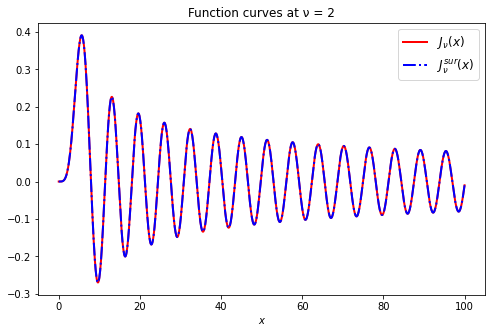

In [19]:
fig = plt.figure(figsize=(8,5))
plt.plot(x, bessel.surrogate(4.30), 'r', lw=2, label='$J_ν(x)$')
plt.plot(x, BesselJ(4.30,x), 'b-.', lw=2, label='$J_ν^{sur}(x)$')
plt.xlabel('$x$')
plt.title('Function curves at ν = 2')
plt.legend(fontsize = 'large')

In [20]:
nu_val = np.linspace(1,5, 1001)

In [21]:
norm = bessel.basis_.integration.norm

In [22]:
par = 4.30
norm(BesselJ(par, x) - bessel.surrogate(par))/norm(BesselJ(par, x))

1.874696434625335e-09

In [23]:
errors = np.array(
    [norm(BesselJ(par, x) - bessel.surrogate(par))/norm(BesselJ(par, x))
     for par in nu_val]
     )

In [24]:
from matplotlib import ticker

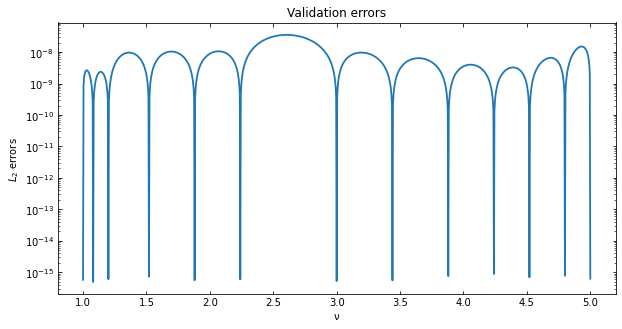

In [25]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(nu_val, errors, lw=1.8)
ax.set_yscale('log')
y_major = ticker.LogLocator(base = 10, numticks = 10)
ax.yaxis.set_major_locator(y_major)
y_minor = ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 20)
ax.yaxis.set_minor_locator(y_minor)
ax.set_xlabel('ν')
ax.set_ylabel('$L_2$ errors')
ax.set_title('Validation errors')
ax.yaxis.set_ticks_position('both')
ax.tick_params(direction='in', which='both')
ax.xaxis.set_ticks_position('both')

Timeit both models

In [20]:
par = 9.91
%timeit -t bessel.surrogate(par)

323 µs ± 35.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
%timeit -t BesselJ(par, x)

1.49 ms ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
